# Workshop Tutorial Example Solutions: Flux Scaling

These are just an example of the many possible solutions to the exercises in [Workshop Tutorial: Flux Scaling](./Tutorial_pblum_l3_distance.ipynb)

In [1]:
import phoebe
import numpy as np


**NOTE**: this tutorial is a bit of a tangent and will not be used directly in the following tutorials, so don't feel that it is necessary to complete all the exercises below. For any that do seem interesting to you, you may need to dig a little deeper into the explanations in the linked online docs for details about how each option works and feel free to ask questions!


**Make a plot of multiple light curves in different passbands.  Have one passband be set so that the out-of-eclipse flux is approximately one (using `pblum_mode='component-coupled'` and manually adjusting `pblum` and calling `run_compute` or `compute_pblums(pbflux=True)`) and the other light curves all coupled relative to that (using `'dataset-coupled'` and setting the `pblum_dataset` parameter).  Try naming the datasets appropriately and include labels on the plot.**

In [2]:
b = phoebe.default_binary()
b.add_dataset('lc', compute_phases=phoebe.linspace(0,1,101), passband='Johnson:V', dataset='lcV')
b.add_dataset('lc', compute_phases=phoebe.linspace(0,1,101), passband='Johnson:B', dataset='lcB')

<ParameterSet: 45 parameters | contexts: figure, constraint, compute, dataset>

In [3]:
print(b.filter(qualifier='pblum*', dataset='lcV'))

ParameterSet: 3 parameters
           pblum_mode@lcV@dataset: component-coupled
      pblum_component@lcV@dataset: primary
        pblum@primary@lcV@dataset: 12.566370614359172 W


In [4]:
print(b.compute_pblums(dataset='lcV', pbflux=True))

{'pblum@primary@lcV': <Quantity 12.56637061 W>, 'pblum@secondary@lcV': <Quantity 12.56637061 W>, 'pbflux@lcV': <Quantity 2. W / m2>}


In [5]:
b.set_value('pblum', component='primary', dataset='lcV', value=2*np.pi)

In [6]:
print(b.compute_pblums(dataset='lcV', pbflux=True))

{'pblum@primary@lcV': <Quantity 6.28318531 W>, 'pblum@secondary@lcV': <Quantity 6.28318531 W>, 'pbflux@lcV': <Quantity 1. W / m2>}


In [7]:
print(b.filter(qualifier='pblum*', dataset='lcB'))

ParameterSet: 3 parameters
           pblum_mode@lcB@dataset: component-coupled
      pblum_component@lcB@dataset: primary
        pblum@primary@lcB@dataset: 12.566370614359172 W


In [8]:
b.set_value('pblum_mode', dataset='lcB', value='dataset-coupled')

In [9]:
print(b.filter(qualifier='pblum*', dataset='lcB'))

ParameterSet: 2 parameters
           pblum_mode@lcB@dataset: dataset-coupled
        pblum_dataset@lcB@dataset: lcV


In [10]:
b.run_compute()

100%|██████████| 101/101 [00:02<00:00, 47.21it/s]


<ParameterSet: 5 parameters | datasets: lcV, lcB>

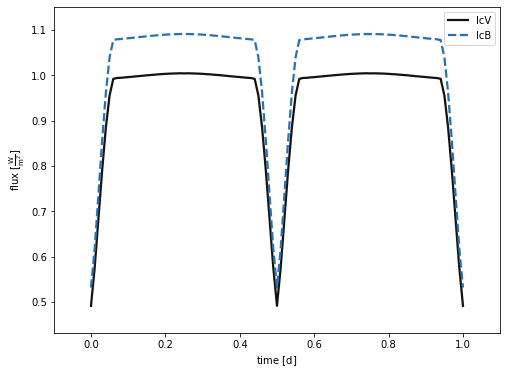

In [11]:
_ = b.plot(show=True, legend=True)

**Set `pblum_mode` to `'component-coupled'` or `'absolute'` and show how third light (either in flux or fractional units) affects a light curve and the luminosities.**  (**NOTE**: `pbflux=True` is _intrinsic_ only and so does not account for third light)**

In [12]:
b = phoebe.default_binary()
b.add_dataset('lc', compute_phases=phoebe.linspace(0,1,101), pblum_mode='absolute')

<ParameterSet: 78 parameters | contexts: figure, constraint, compute, dataset>

In [13]:
print(b.compute_pblums(pbflux=True))

{'pblum@primary@lc01': <Quantity 5.4512053e+25 W>, 'pblum@secondary@lc01': <Quantity 5.4512053e+25 W>, 'pbflux@lc01': <Quantity 8.67586269e+24 W / m2>}


In [14]:
b.run_compute(model='l3off')

100%|██████████| 101/101 [00:01<00:00, 60.38it/s]


<ParameterSet: 3 parameters | qualifiers: times, fluxes, comments>

In [15]:
print(b.filter(qualifier='l3*'))

ParameterSet: 2 parameters
             l3_mode@lc01@dataset: flux
                  l3@lc01@dataset: 0.0 W / m2


In [16]:
b.set_value('l3', 1e24)

In [18]:
b.run_compute(model='l3_flux')

100%|██████████| 101/101 [00:01<00:00, 58.87it/s]


<ParameterSet: 3 parameters | qualifiers: times, fluxes, comments>

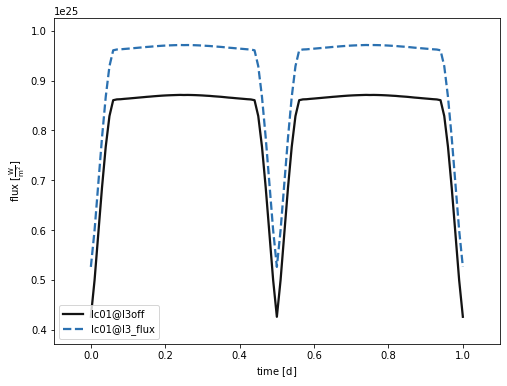

In [19]:
_ = b.plot(show=True, legend=True)

In [20]:
print(b.get_parameter('l3_mode').choices)

['flux', 'fraction']


In [21]:
b.set_value('l3_mode', 'fraction')

In [22]:
print(b.filter(qualifier='l3*'))

ParameterSet: 2 parameters
             l3_mode@lc01@dataset: fraction
             l3_frac@lc01@dataset: 0.0


In [23]:
b.set_value('l3_frac', 0.1)

In [25]:
b.run_compute(model='l3_fraction')

100%|██████████| 101/101 [00:01<00:00, 58.98it/s]


<ParameterSet: 3 parameters | qualifiers: times, fluxes, comments>

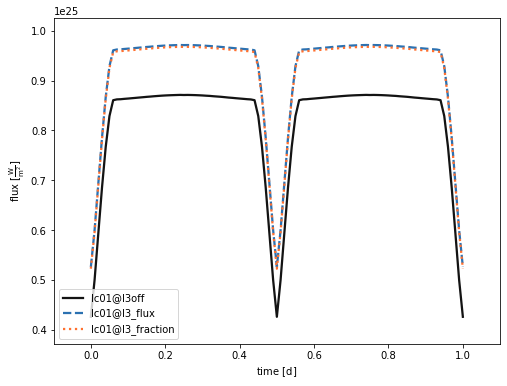

In [26]:
_ = b.plot(show=True, legend=True)

**Do the same for `distance` as you just did for third light: set `pblum_mode` to `'component-coupled'` or `'absolute'` and show how changing the distance affects the flux-levels in a light curve.** (**NOTE**: `pbflux=True` is _intrinsic_ only and so does not account for distance)

In [27]:
b = phoebe.default_binary()

b.add_dataset('lc', compute_phases=phoebe.linspace(0,1,101))

<ParameterSet: 78 parameters | contexts: figure, constraint, compute, dataset>

In [28]:
print(b.filter(qualifier='distance'))

ParameterSet: 1 parameters
                  distance@system: 1.0 m


In [30]:
b.run_compute(model='original')

100%|██████████| 101/101 [00:01<00:00, 53.92it/s]


<ParameterSet: 3 parameters | qualifiers: times, fluxes, comments>

In [31]:
b.set_value('distance', value=2)

In [33]:
b.run_compute(model='distance_halved')

100%|██████████| 101/101 [00:01<00:00, 59.83it/s]


<ParameterSet: 3 parameters | qualifiers: times, fluxes, comments>

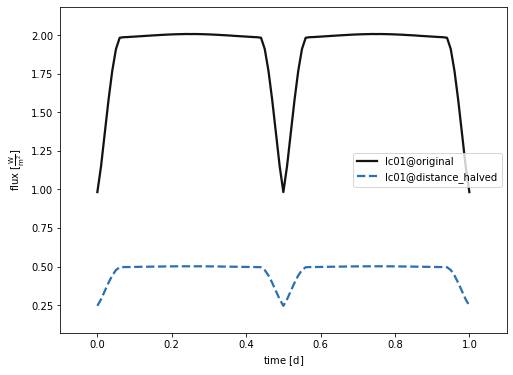

In [34]:
_ = b.plot(show=True, legend=True)

**Combine non-zero `l3` and non-unity `distance` and see how the output from `compute_pblums` changes.**